
Vecteur propre:
1.8751040687119611
Valeur de l'équation:
1.1102230246251565e-16

Vecteur propre:
4.694091132974175
Valeur de l'équation:
2.3647750424515834e-14

Vecteur propre:
7.854757438237613
Valeur de l'équation:
-8.704148513061227e-14

Vecteur propre:
10.995540734875467
Valeur de l'équation:
7.340683616519073e-12

Vecteur propre:
14.13716839104647
Valeur de l'équation:
-9.371081688414051e-11

Vecteur propre:
17.278759532088237
Valeur de l'équation:
1.7810038333010425e-08

Vecteur propre:
20.42035225104125
Valeur de l'équation:
-6.825807852273158e-08

Vecteur propre:
23.561944901806445
Valeur de l'équation:
1.3439708729579003e-05

Vecteur propre:
26.7035375555183
Valeur de l'équation:
6.237990383906045e-06

Vecteur propre:
29.845130209102816
Valeur de l'équation:
-0.0052800496220328785


0.0
[ 0.  +3.51601527j -0.  -3.51601527j  0. +61.69721441j  0. -61.69721441j
  0.+199.85953012j  0.-199.85953012j  0.+416.99078606j  0.-416.99078606j
  0.+713.07891798j  0.-713.07891798j  0. +22.0

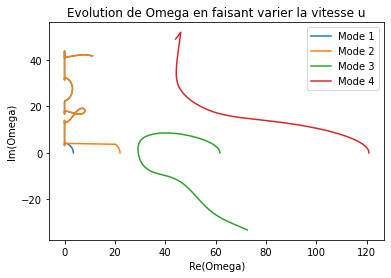

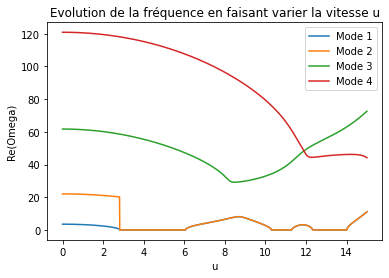

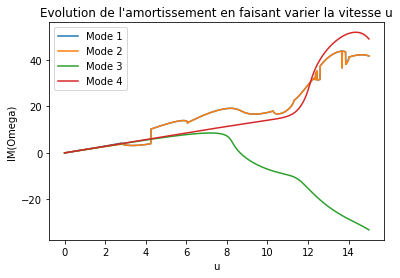

In [1]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as mpl


### Paramètres du tuyau ###
L = 0.5
E = 0.06895*10**6
#E = 10**6
d = 6.35*10**-3
D = 15.875*10**-3
I = np.pi*(D**4-d**4)/64
rho_eco = 1064.61
rho_eau = 1000
M = rho_eau*d**2/4
m = rho_eco*(D**2-d**2)/4
g = 9.81
N = 10
mode1 = 0
mode2 = 5
mode3 = 1
mode4 = 6

### Paramtètres adimensionnés ###
beta = M/(M+m)
gamma = (m+M)*L**3*g/(E*I)
gamma = 0
beta = 0.5

### Fonction donnant les valeurs propres de poutre ###
def Eq_Cara(Lambda):
    return np.cos(Lambda)*np.cosh(Lambda)+1

LAMBDA = []

for i in range(N):
    LL_Guess = np.pi*(2*i+1)/2
    x0 = LL_Guess + 0.1
    x1 = LL_Guess - 0.1
    while abs(x0-x1)>10**-16:
        xnew = x0 - (x0-x1)*Eq_Cara(x0)/(Eq_Cara(x0)-Eq_Cara(x1))
        x1 = x0
        x0 = xnew
    LAMBDA.append(x0)

for i in LAMBDA:
    print("\nVecteur propre:")
    print(i)
    print("Valeur de l'équation:")
    print(Eq_Cara(i))
print("\n")


def sigma(r):
    return ((np.sinh(L*LAMBDA[r])-np.sin(L*LAMBDA[r]))/(np.cosh(L*LAMBDA[r])+np.cos(L*LAMBDA[r])))

def bsr(s,r):
    if s == r:
        return 2
    else:
        return 4/((LAMBDA[s]/LAMBDA[r])**2+(-1)**(r+s))
    
def csr(s,r):
    if s == r:
        return LAMBDA[r]*sigma(r)*(2-LAMBDA[r]*sigma(r))
    else:
        return 4*(LAMBDA[r]*sigma(r)-LAMBDA[s]*sigma(s))/((-1)**(r+s)-(LAMBDA[s]/LAMBDA[r])**2)
    
def dsr(s,r):
    if s == r:
        return csr(s,r)/2
    else:
        return (4*(LAMBDA[r]*sigma(r)-LAMBDA[s]*sigma(s)+2)*(-1)**(r+s))/(1-(LAMBDA[s]/LAMBDA[r])**4)-((3+(LAMBDA[s]/LAMBDA[r])**4)/(1-((LAMBDA[s]/LAMBDA[r])**4)))*bsr(s,r)                                                                                                                                               

U = np.linspace(0,4,40)
U = np.array([2])
u_array = (M/(E*I))**0.5*L*U
u_array = np.linspace(0,15,1501)


B = np.zeros((N,N))
C = np.zeros((N,N))
D = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        B[i,j] = bsr(i,j)  
        C[i,j] = csr(i,j)
        D[i,j] = dsr(i,j)

Delta = np.zeros((N,N))
for i in range(N):
    Delta[i,i] = LAMBDA[i]**4

IM_Omega = np.zeros((len(u_array),N))
RE_Omega = np.zeros((len(u_array),N))

u = u_array[0]
MM = np.eye(N)
C_g = 2*beta**0.5*u*B
K = Delta + gamma*B + (u**2-gamma)*C + gamma*D
F = np.block([[np.zeros((N,N)),MM],[MM,C_g]])
E = np.block([[-MM,np.zeros((N,N))],[np.zeros((N,N)),K]])     

eigenValues, eigenVectors = linalg.eig(-np.dot(np.linalg.inv(F),E))

print(u)
print(eigenValues)

l = 0
while l < len(eigenValues):
        if eigenValues[l].imag < 0:
            eigenValues = np.delete(eigenValues,l)
        else:
            l += 1

for l in range(N):
    IM_Omega[0,l] = (-1j*eigenValues[l]).imag
    RE_Omega[0,l] = (-1j*eigenValues[l]).real

for i in range(1,len(u_array)):
    u = u_array[i]
    MM = np.eye(N)
    C_g = 2*beta**0.5*u*B
    K = Delta + gamma*B + (u**2-gamma)*C + gamma*D
    F = np.block([[np.zeros((N,N)),MM],[MM,C_g]])
    E = np.block([[-MM,np.zeros((N,N))],[np.zeros((N,N)),K]])     

    eigenValues, eigenVectors = linalg.eig(-np.dot(np.linalg.inv(F),E))
    
    if u%2 == 0:
        print(u)
        print(eigenValues)
    
    l = 0
    while l < len(eigenValues):
        if eigenValues[l].imag < 0:
            eigenValues = np.delete(eigenValues,l)
        else:
            l += 1
    
    
    diff = np.zeros((N,N))
    for l in range(N):
        for k in range(N):
            diff[l,k] = abs(IM_Omega[i-1,l]-(-1j*eigenValues[k]).imag) + abs(RE_Omega[i-1,l]-(-1j*eigenValues[k]).real)
    arg_Min = np.argmin(diff,1)
    for l in range(N):
        IM_Omega[i,l] = (-1j*eigenValues[arg_Min[l]]).imag
        RE_Omega[i,l] = (-1j*eigenValues[arg_Min[l]]).real
        
        # print(np.linalg.matrix_rank(eigenValues[mode]*np.eye(2*N)+np.dot(np.linalg.inv(F),E)))
        # print(np.linalg.det(eigenValues[mode]*np.eye(2*N)+np.dot(np.linalg.inv(F),E)))
   
mpl.plot(RE_Omega[:,mode1],IM_Omega[:,mode1],label="Mode 1")
mpl.plot(RE_Omega[:,mode2],IM_Omega[:,mode2],label="Mode 2")
mpl.plot(RE_Omega[:,mode3],IM_Omega[:,mode3],label="Mode 3")
mpl.plot(RE_Omega[:,mode4],IM_Omega[:,mode4],label="Mode 4")
mpl.xlabel("Re(Omega)")
mpl.ylabel("Im(Omega)")
mpl.title("Evolution de Omega en faisant varier la vitesse u")
mpl.legend()
mpl.savefig('beta' + str(beta) + '.jpg')
mpl.show()

mpl.plot(u_array,RE_Omega[:,mode1],label="Mode 1")
mpl.plot(u_array,RE_Omega[:,mode2],label="Mode 2")
mpl.plot(u_array,RE_Omega[:,mode3],label="Mode 3")
mpl.plot(u_array,RE_Omega[:,mode4],label="Mode 4")
mpl.xlabel("u")
mpl.ylabel("Re(Omega)")
mpl.title("Evolution de la fréquence en faisant varier la vitesse u")
mpl.legend()
mpl.show()

mpl.plot(u_array,IM_Omega[:,mode1],label="Mode 1")
mpl.plot(u_array,IM_Omega[:,mode2],label="Mode 2")
mpl.plot(u_array,IM_Omega[:,mode3],label="Mode 3")
mpl.plot(u_array,IM_Omega[:,mode4],label="Mode 4")
mpl.xlabel("u")
mpl.ylabel("IM(Omega)")
mpl.title("Evolution de l'amortissement en faisant varier la vitesse u")
mpl.legend()
mpl.show()